In [3]:
#Importamos las libreias pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
#Carga desde un archivo .xlsx sin indice 
df= pd.read_csv('pais private room_mex.csv')
df

listing_url  host_since  \
0                  https://www.airbnb.com/rooms/131610  2011-05-31   
1                  https://www.airbnb.com/rooms/171109  2011-07-13   
2                 https://www.airbnb.com/rooms/1013504  2012-01-28   
3                 https://www.airbnb.com/rooms/1051636  2014-10-10   
4                 https://www.airbnb.com/rooms/1066945  2013-04-10   
...                                                ...         ...   
8688  https://www.airbnb.com/rooms/1251897198681126075  2023-11-15   
8689  https://www.airbnb.com/rooms/1252141718111439700  2016-04-16   
8690  https://www.airbnb.com/rooms/1252159821531694005  2024-08-13   
8691  https://www.airbnb.com/rooms/1252185591721328995  2024-08-13   
8692  https://www.airbnb.com/rooms/1252218347521498445  2024-08-13   

      host_response_time host_response_rate host_acceptance_rate  \
0     a few days or more               100%                  92%   
1     within a few hours               100%                  78%   
2         within an hour               100%                 100%   
3     a few days or more               100%                  92%   
4         within an hour               100%                  75%   
...                  ...                ...                  ...   
8688  a few days or more               100%                  92%   
8689      within an hour               100%                 100%   
8690      within an hour               100%                 100%   
8691      within an hour               100%                 100%   
8692      within an hour               100%                 100%   

     host_is_superhost  host_verifications neighbourhood_cleansed  \
0                    f           ['phone']               Coyoacán   
1                    t  ['email', 'phone']          Benito Juárez   
2                    t  ['email', 'phone']               Coyoacán   
3                    f  ['email', 'phone']             Cuauhtémoc   
4                    f  ['email', 'phone']               Coyoacán   
...                ...                 ...                    ...   
8688                 f           ['phone']             Xochimilco   
8689                 t  ['email', 'phone']         Miguel Hidalgo   
8690                 f  ['email', 'phone']         Miguel Hidalgo   
8691                 f  ['email', 'phone']         Miguel Hidalgo   
8692                 f  ['email', 'phone']         Miguel Hidalgo   

                    property_type     room_type  ...  \
0                    Private room  Private room  ...   
1     Private room in rental unit  Private room  ...   
2            Private room in home  Private room  ...   
3           Private room in condo  Private room  ...   
4     Private room in guest suite  Private room  ...   
...                           ...           ...  ...   
8688         Private room in home  Private room  ...   
8689   Private room in guesthouse  Private room  ...   
8690                Room in hotel  Private room  ...   
8691                Room in hotel  Private room  ...   
8692                Room in hotel  Private room  ...   

     review_scores_cleanliness review_scores_checkin  \
0                         4.84                  4.80   
1                         4.61                  4.98   
2                         4.92                  4.92   
3                         4.97                  4.97   
4                         4.97                  4.96   
...                        ...                   ...   
8688                      4.84                  4.80   
8689                      4.84                  4.80   
8690                      4.84                  4.80   
8691                      4.84                  4.80   
8692                      4.84                  4.80   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.80                   4.80                4.70   
1                           4.95                   4

In [5]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

In [6]:
# Eliminar los signos de dólar y las comas, luego convertir a float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ramos\AppData\Local\Temp\ipykernel_23300\2661366386.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

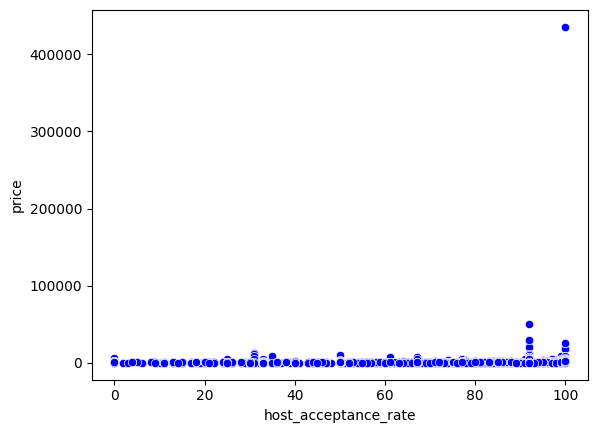

In [7]:
#Inprimimos el scatter plot entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento de su dispeción
from turtle import color 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)

In [8]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']

In [9]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
#Veerficamos la finción relacionada al modelo
type (model)

sklearn.linear_model._base.LinearRegression

In [11]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [12]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.25311886]),
 'rank_': 1,
 'singular_': array([2504.51707852]),
 'intercept_': 551.8971898421105}

In [13]:
model.score(Vars_Indep,Vars_Dep)

0.00015766673879391568

In [14]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model.predict(X=df[['host_acceptance_rate']])
y_pred

array([759.18412523, 727.64046115, 777.20907614, ..., 777.20907614,
       777.20907614, 777.20907614])

In [15]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones', y_pred)
df

Predicciones                                       listing_url  \
0       759.184125               https://www.airbnb.com/rooms/131610   
1       727.640461               https://www.airbnb.com/rooms/171109   
2       777.209076              https://www.airbnb.com/rooms/1013504   
3       759.184125              https://www.airbnb.com/rooms/1051636   
4       720.881105              https://www.airbnb.com/rooms/1066945   
...            ...                                               ...   
8688    759.184125  https://www.airbnb.com/rooms/1251897198681126075   
8689    777.209076  https://www.airbnb.com/rooms/1252141718111439700   
8690    777.209076  https://www.airbnb.com/rooms/1252159821531694005   
8691    777.209076  https://www.airbnb.com/rooms/1252185591721328995   
8692    777.209076  https://www.airbnb.com/rooms/1252218347521498445   

      host_since  host_response_time host_response_rate  host_acceptance_rate  \
0     2011-05-31  a few days or more               100%                  92.0   
1     2011-07-13  within a few hours               100%                  78.0   
2     2012-01-28      within an hour               100%                 100.0   
3     2014-10-10  a few days or more               100%                  92.0   
4     2013-04-10      within an hour               100%                  75.0   
...          ...                 ...                ...                   ...   
8688  2023-11-15  a few days or more               100%                  92.0   
8689  2016-04-16      within an hour               100%                 100.0   
8690  2024-08-13      within an hour               100%                 100.0   
8691  2024-08-13      within an hour               100%                 100.0   
8692  2024-08-13      within an hour               100%                 100.0   

     host_is_superhost  host_verifications neighbourhood_cleansed  \
0                    f           ['phone']               Coyoacán   
1                    t  ['email', 'phone']          Benito Juárez   
2                    t  ['email', 'phone']               Coyoacán   
3                    f  ['email', 'phone']             Cuauhtémoc   
4                    f  ['email', 'phone']               Coyoacán   
...                ...                 ...                    ...   
8688                 f           ['phone']             Xochimilco   
8689                 t  ['email', 'phone']         Miguel Hidalgo   
8690                 f  ['email', 'phone']         Miguel Hidalgo   
8691                 f  ['email', 'phone']         Miguel Hidalgo   
8692                 f  ['email', 'phone']         Miguel Hidalgo   

                    property_type  ... review_scores_cleanliness  \
0                    Private room  ...                      4.84   
1     Private room in rental unit  ...                      4.61   
2            Private room in home  ...                      4.92   
3           Private room in condo  ...                      4.97   
4     Private room in guest suite  ...                      4.97   
...                           ...  ...                       ...   
8688         Private room in home  ...                      4.84   
8689   Private room in guesthouse  ...                      4.84   
8690                Room in hotel  ...                      4.84   
8691                Room in hotel  ...                      4.84   
8692                Room in hotel  ...                      4.84   

     review_scores_checkin review_scores_communication  \
0                     4.80                        4.80   
1                     4.98                        4.95   
2                     4.92                        4.94   
3                     4.97                        4.77   
4                     4.96                        4.91   
...                    ...                         ...   
8688                  4.80                        4.80   
8689                  4.80                        4.80   


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

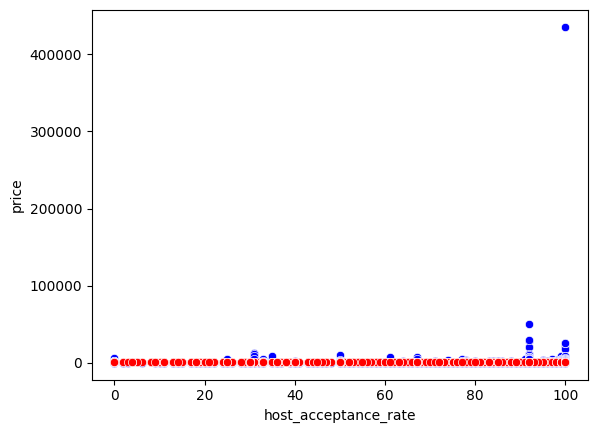

In [16]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=df)

In [17]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.00015766673879391568

In [18]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.012556541673323738

**price vs host_is_superhost**

In [19]:
# Convertir los valores 'True' y 'False' a valores booleanos y luego a numéricos
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False, 'Sin identificar': False}).astype(int)

<Axes: xlabel='host_is_superhost', ylabel='price'>

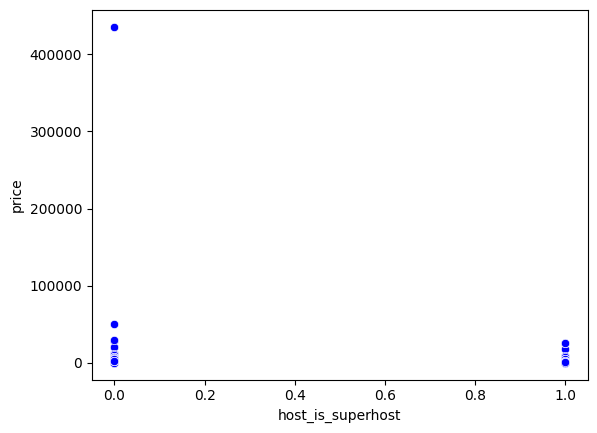

In [20]:
#Inprimimos el scatter plot entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento de su dispeción
from turtle import color 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)

In [21]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep1 = df[['host_is_superhost']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep1 = df['price']

In [22]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [23]:
#Verificamos la finción relacionada al modelo
type (model1)

sklearn.linear_model._base.LinearRegression

In [24]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Vars_Dep1)

LinearRegression()

In [25]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-80.23068741]),
 'rank_': 1,
 'singular_': array([42.80117033]),
 'intercept_': 767.0637666831442}

In [26]:
model1.score(Vars_Indep1,Vars_Dep1)

5.8387004914117746e-05

In [27]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred1 = model1.predict(X=df[['host_is_superhost']])
y_pred1

array([767.06376668, 686.83307927, 686.83307927, ..., 767.06376668,
       767.06376668, 767.06376668])

In [28]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones1', y_pred1)
df

Predicciones1  Predicciones  \
0        767.063767    759.184125   
1        686.833079    727.640461   
2        686.833079    777.209076   
3        767.063767    759.184125   
4        767.063767    720.881105   
...             ...           ...   
8688     767.063767    759.184125   
8689     686.833079    777.209076   
8690     767.063767    777.209076   
8691     767.063767    777.209076   
8692     767.063767    777.209076   

                                           listing_url  host_since  \
0                  https://www.airbnb.com/rooms/131610  2011-05-31   
1                  https://www.airbnb.com/rooms/171109  2011-07-13   
2                 https://www.airbnb.com/rooms/1013504  2012-01-28   
3                 https://www.airbnb.com/rooms/1051636  2014-10-10   
4                 https://www.airbnb.com/rooms/1066945  2013-04-10   
...                                                ...         ...   
8688  https://www.airbnb.com/rooms/1251897198681126075  2023-11-15   
8689  https://www.airbnb.com/rooms/1252141718111439700  2016-04-16   
8690  https://www.airbnb.com/rooms/1252159821531694005  2024-08-13   
8691  https://www.airbnb.com/rooms/1252185591721328995  2024-08-13   
8692  https://www.airbnb.com/rooms/1252218347521498445  2024-08-13   

      host_response_time host_response_rate  host_acceptance_rate  \
0     a few days or more               100%                  92.0   
1     within a few hours               100%                  78.0   
2         within an hour               100%                 100.0   
3     a few days or more               100%                  92.0   
4         within an hour               100%                  75.0   
...                  ...                ...                   ...   
8688  a few days or more               100%                  92.0   
8689      within an hour               100%                 100.0   
8690      within an hour               100%                 100.0   
8691      within an hour               100%                 100.0   
8692      within an hour               100%                 100.0   

      host_is_superhost  host_verifications neighbourhood_cleansed  ...  \
0                     0           ['phone']               Coyoacán  ...   
1                     1  ['email', 'phone']          Benito Juárez  ...   
2                     1  ['email', 'phone']               Coyoacán  ...   
3                     0  ['email', 'phone']             Cuauhtémoc  ...   
4                     0  ['email', 'phone']               Coyoacán  ...   
...                 ...                 ...                    ...  ...   
8688                  0           ['phone']             Xochimilco  ...   
8689                  1  ['email', 'phone']         Miguel Hidalgo  ...   
8690                  0  ['email', 'phone']         Miguel Hidalgo  ...   
8691                  0  ['email', 'phone']         Miguel Hidalgo  ...   
8692                  0  ['email', 'phone']         Miguel Hidalgo  ...   

     review_scores_cleanliness review_scores_checkin  \
0                         4.84                  4.80   
1                         4.61                  4.98   
2                         4.92                  4.92   
3                         4.97                  4.97   
4                         4.97                  4.96   
...                        ...                   ...   
8688                      4.84                  4.80   
8689                      4.84                  4.80   
8690                      4.84                  4.80   
8691                      4.84                  4.80   
8692                      4.84                  4.80   

     review_scores_communication review_scores_location  review_scores_value  \
0                           4.80                   4.80                 4.70   
1                           4.95                   4.97                 4.81   
2                           4.94                   4.92                 4.89 

<Axes: xlabel='host_is_superhost', ylabel='price'>

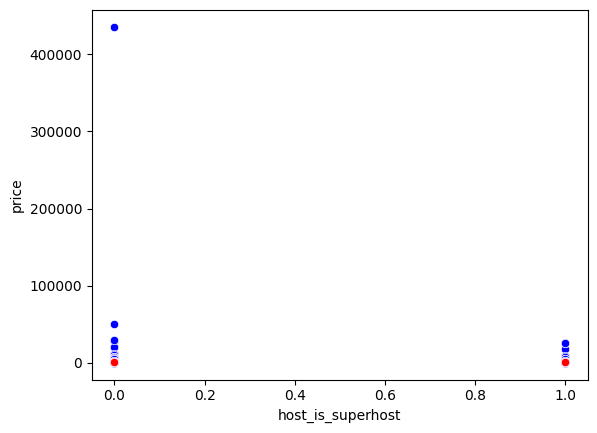

In [29]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones1', color="red", data=df)

In [30]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1 = model1.score(X=Vars_Indep1, y=Vars_Dep1)
coef_Deter1

5.8387004914117746e-05

In [31]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl1 = np.sqrt(coef_Deter1)
coef_Correl1

0.007641138980159813

**accommodates vs bathrooms**

<Axes: xlabel='bathrooms', ylabel='accommodates'>

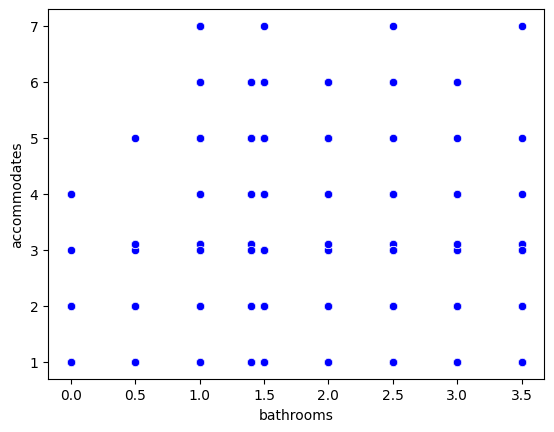

In [32]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)

In [33]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep2 = df[['bathrooms']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep2 = df['accommodates']

In [34]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [35]:
#Veerficamos la finción relacionada al modelo
type (model2)

sklearn.linear_model._base.LinearRegression

In [36]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Vars_Dep2)

LinearRegression()

In [37]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.16512488]),
 'rank_': 1,
 'singular_': array([37.20480587]),
 'intercept_': 1.7441807017500905}

In [38]:
model2.score(Vars_Indep2,Vars_Dep2)

0.005646450536709646

In [39]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred2 = model2.predict(X=df[['bathrooms']])
y_pred2

array([1.90930558, 1.90930558, 1.99186802, ..., 1.90930558, 1.90930558,
       1.90930558])

In [40]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones2', y_pred2)
df

Predicciones2  Predicciones1  Predicciones  \
0          1.909306     767.063767    759.184125   
1          1.909306     686.833079    727.640461   
2          1.991868     686.833079    777.209076   
3          1.909306     767.063767    759.184125   
4          1.909306     767.063767    720.881105   
...             ...            ...           ...   
8688       2.074430     767.063767    759.184125   
8689       1.909306     686.833079    777.209076   
8690       1.909306     767.063767    777.209076   
8691       1.909306     767.063767    777.209076   
8692       1.909306     767.063767    777.209076   

                                           listing_url  host_since  \
0                  https://www.airbnb.com/rooms/131610  2011-05-31   
1                  https://www.airbnb.com/rooms/171109  2011-07-13   
2                 https://www.airbnb.com/rooms/1013504  2012-01-28   
3                 https://www.airbnb.com/rooms/1051636  2014-10-10   
4                 https://www.airbnb.com/rooms/1066945  2013-04-10   
...                                                ...         ...   
8688  https://www.airbnb.com/rooms/1251897198681126075  2023-11-15   
8689  https://www.airbnb.com/rooms/1252141718111439700  2016-04-16   
8690  https://www.airbnb.com/rooms/1252159821531694005  2024-08-13   
8691  https://www.airbnb.com/rooms/1252185591721328995  2024-08-13   
8692  https://www.airbnb.com/rooms/1252218347521498445  2024-08-13   

      host_response_time host_response_rate  host_acceptance_rate  \
0     a few days or more               100%                  92.0   
1     within a few hours               100%                  78.0   
2         within an hour               100%                 100.0   
3     a few days or more               100%                  92.0   
4         within an hour               100%                  75.0   
...                  ...                ...                   ...   
8688  a few days or more               100%                  92.0   
8689      within an hour               100%                 100.0   
8690      within an hour               100%                 100.0   
8691      within an hour               100%                 100.0   
8692      within an hour               100%                 100.0   

      host_is_superhost  host_verifications  ... review_scores_cleanliness  \
0                     0           ['phone']  ...                      4.84   
1                     1  ['email', 'phone']  ...                      4.61   
2                     1  ['email', 'phone']  ...                      4.92   
3                     0  ['email', 'phone']  ...                      4.97   
4                     0  ['email', 'phone']  ...                      4.97   
...                 ...                 ...  ...                       ...   
8688                  0           ['phone']  ...                      4.84   
8689                  1  ['email', 'phone']  ...                      4.84   
8690                  0  ['email', 'phone']  ...                      4.84   
8691                  0  ['email', 'phone']  ...                      4.84   
8692                  0  ['email', 'phone']  ...                      4.84   

     review_scores_checkin review_scores_communication review_scores_location  \
0                     4.80                        4.80                   4.80   
1                     4.98                        4.95                   4.97   
2                     4.92                        4.94                   4.92   
3                     4.97                        4.77                   4.93   
4                     4.96                        4.91                   4.97   
...                    ...                         ...                    ...   
8688                  4.80                        4.80                   4.80   
8689                  4.80                        4.80                   4.80   
8690                  4.80                   

<Axes: xlabel='bathrooms', ylabel='accommodates'>

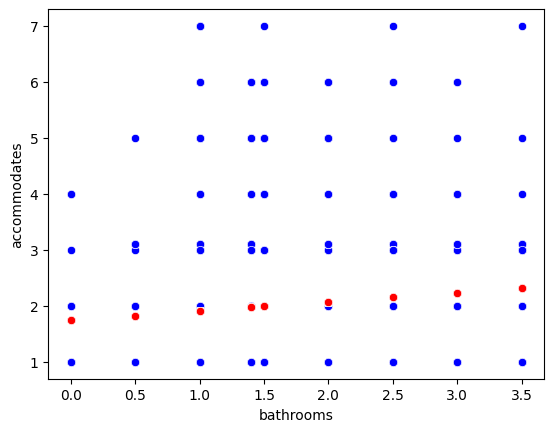

In [41]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones2', color="red", data=df)

In [42]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2 = model2.score(X=Vars_Indep2, y=Vars_Dep2)
coef_Deter2

0.005646450536709646

In [43]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl2 = np.sqrt(coef_Deter2)
coef_Correl2

0.07514286750390649

**price vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

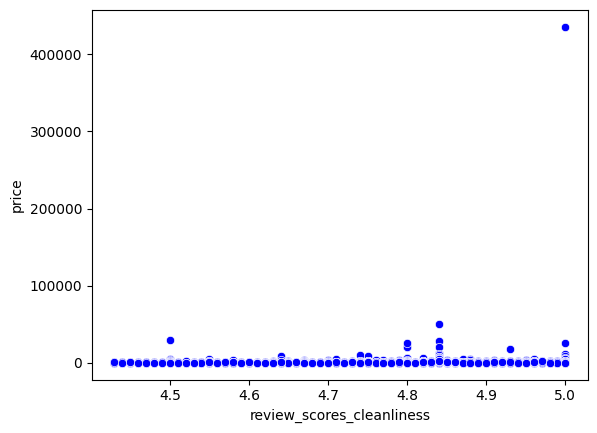

In [44]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)

In [45]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep3 = df[['review_scores_cleanliness']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep3 = df['price']

In [46]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()

In [47]:
#Veerficamos la finción relacionada al modelo
type (model3)

sklearn.linear_model._base.LinearRegression

In [48]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Vars_Dep3)

LinearRegression()

In [49]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([762.89581386]),
 'rank_': 1,
 'singular_': array([12.42972654]),
 'intercept_': -2948.3534204252483}

In [50]:
model3.score(Vars_Indep3,Vars_Dep3)

0.0004452229002471775

In [51]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred3 = model3.predict(X=df[['review_scores_cleanliness']])
y_pred3

array([744.06231864, 568.59628146, 805.09398375, ..., 744.06231864,
       744.06231864, 744.06231864])

In [52]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones3', y_pred3)
df

Predicciones3  Predicciones2  Predicciones1  Predicciones  \
0        744.062319       1.909306     767.063767    759.184125   
1        568.596281       1.909306     686.833079    727.640461   
2        805.093984       1.991868     686.833079    777.209076   
3        843.238774       1.909306     767.063767    759.184125   
4        843.238774       1.909306     767.063767    720.881105   
...             ...            ...            ...           ...   
8688     744.062319       2.074430     767.063767    759.184125   
8689     744.062319       1.909306     686.833079    777.209076   
8690     744.062319       1.909306     767.063767    777.209076   
8691     744.062319       1.909306     767.063767    777.209076   
8692     744.062319       1.909306     767.063767    777.209076   

                                           listing_url  host_since  \
0                  https://www.airbnb.com/rooms/131610  2011-05-31   
1                  https://www.airbnb.com/rooms/171109  2011-07-13   
2                 https://www.airbnb.com/rooms/1013504  2012-01-28   
3                 https://www.airbnb.com/rooms/1051636  2014-10-10   
4                 https://www.airbnb.com/rooms/1066945  2013-04-10   
...                                                ...         ...   
8688  https://www.airbnb.com/rooms/1251897198681126075  2023-11-15   
8689  https://www.airbnb.com/rooms/1252141718111439700  2016-04-16   
8690  https://www.airbnb.com/rooms/1252159821531694005  2024-08-13   
8691  https://www.airbnb.com/rooms/1252185591721328995  2024-08-13   
8692  https://www.airbnb.com/rooms/1252218347521498445  2024-08-13   

      host_response_time host_response_rate  host_acceptance_rate  \
0     a few days or more               100%                  92.0   
1     within a few hours               100%                  78.0   
2         within an hour               100%                 100.0   
3     a few days or more               100%                  92.0   
4         within an hour               100%                  75.0   
...                  ...                ...                   ...   
8688  a few days or more               100%                  92.0   
8689      within an hour               100%                 100.0   
8690      within an hour               100%                 100.0   
8691      within an hour               100%                 100.0   
8692      within an hour               100%                 100.0   

      host_is_superhost  ... review_scores_cleanliness review_scores_checkin  \
0                     0  ...                      4.84                  4.80   
1                     1  ...                      4.61                  4.98   
2                     1  ...                      4.92                  4.92   
3                     0  ...                      4.97                  4.97   
4                     0  ...                      4.97                  4.96   
...                 ...  ...                       ...                   ...   
8688                  0  ...                      4.84                  4.80   
8689                  1  ...                      4.84                  4.80   
8690                  0  ...                      4.84                  4.80   
8691                  0  ...                      4.84                  4.80   
8692                  0  ...                      4.84                  4.80   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.80                   4.80                4.70   
1                           4.95                   4.97                4.81   
2                           4.94                   4.92                4.89   
3                           4.77                   4.93                4.73   
4                           4.91                   4.97                4.94   
...                          ...                    ...                 ...   
8688             

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

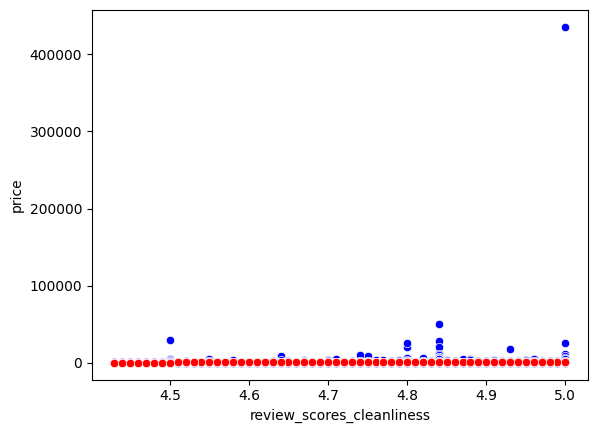

In [53]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones3', color="red", data=df)

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3 = model3.score(X=Vars_Indep3, y=Vars_Dep3)
coef_Deter3

0.0004452229002471775

In [55]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl3 = np.sqrt(coef_Deter3)
coef_Correl3

0.021100305690846696

**price vs instant_bookable**

In [56]:
# Convertir los valores 'True' y 'False' a valores booleanos y luego a numéricos
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False}).astype(int)

<Axes: xlabel='instant_bookable', ylabel='price'>

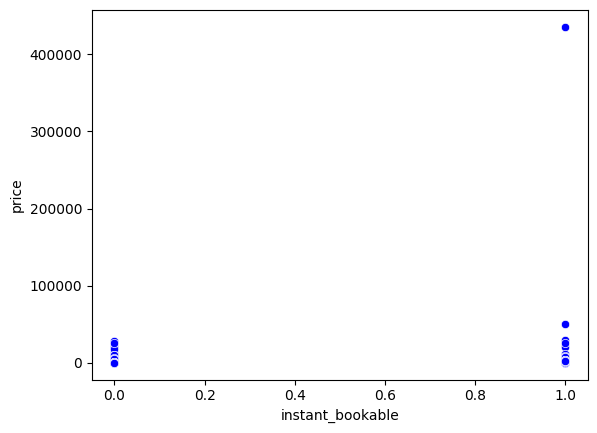

In [57]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)

In [58]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep5 = df[['instant_bookable']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep5 = df['price']

In [59]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()

In [60]:
#Veerficamos la finción relacionada al modelo
type (model5)

sklearn.linear_model._base.LinearRegression

In [61]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Vars_Dep5)

LinearRegression()

In [62]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([422.56024637]),
 'rank_': 1,
 'singular_': array([43.86528376]),
 'intercept_': 603.0943623238232}

In [63]:
model5.score(Vars_Indep5,Vars_Dep5)

0.001701151698711989

In [64]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred5 = model5.predict(X=df[['instant_bookable']])
y_pred5

array([ 603.09436232,  603.09436232,  603.09436232, ..., 1025.6546087 ,
       1025.6546087 , 1025.6546087 ])

In [65]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones5', y_pred5)
df

Predicciones5  Predicciones3  Predicciones2  Predicciones1  \
0        603.094362     744.062319       1.909306     767.063767   
1        603.094362     568.596281       1.909306     686.833079   
2        603.094362     805.093984       1.991868     686.833079   
3        603.094362     843.238774       1.909306     767.063767   
4        603.094362     843.238774       1.909306     767.063767   
...             ...            ...            ...            ...   
8688    1025.654609     744.062319       2.074430     767.063767   
8689    1025.654609     744.062319       1.909306     686.833079   
8690    1025.654609     744.062319       1.909306     767.063767   
8691    1025.654609     744.062319       1.909306     767.063767   
8692    1025.654609     744.062319       1.909306     767.063767   

      Predicciones                                       listing_url  \
0       759.184125               https://www.airbnb.com/rooms/131610   
1       727.640461               https://www.airbnb.com/rooms/171109   
2       777.209076              https://www.airbnb.com/rooms/1013504   
3       759.184125              https://www.airbnb.com/rooms/1051636   
4       720.881105              https://www.airbnb.com/rooms/1066945   
...            ...                                               ...   
8688    759.184125  https://www.airbnb.com/rooms/1251897198681126075   
8689    777.209076  https://www.airbnb.com/rooms/1252141718111439700   
8690    777.209076  https://www.airbnb.com/rooms/1252159821531694005   
8691    777.209076  https://www.airbnb.com/rooms/1252185591721328995   
8692    777.209076  https://www.airbnb.com/rooms/1252218347521498445   

      host_since  host_response_time host_response_rate  host_acceptance_rate  \
0     2011-05-31  a few days or more               100%                  92.0   
1     2011-07-13  within a few hours               100%                  78.0   
2     2012-01-28      within an hour               100%                 100.0   
3     2014-10-10  a few days or more               100%                  92.0   
4     2013-04-10      within an hour               100%                  75.0   
...          ...                 ...                ...                   ...   
8688  2023-11-15  a few days or more               100%                  92.0   
8689  2016-04-16      within an hour               100%                 100.0   
8690  2024-08-13      within an hour               100%                 100.0   
8691  2024-08-13      within an hour               100%                 100.0   
8692  2024-08-13      within an hour               100%                 100.0   

      ...  review_scores_cleanliness review_scores_checkin  \
0     ...                       4.84                  4.80   
1     ...                       4.61                  4.98   
2     ...                       4.92                  4.92   
3     ...                       4.97                  4.97   
4     ...                       4.97                  4.96   
...   ...                        ...                   ...   
8688  ...                       4.84                  4.80   
8689  ...                       4.84                  4.80   
8690  ...                       4.84                  4.80   
8691  ...                       4.84                  4.80   
8692  ...                       4.84                  4.80   

     review_scores_communication review_scores_location review_scores_value  \
0                           4.80                   4.80                4.70   
1                           4.95                   4.97                4.81   
2                           4.94                   4.92                4.89   
3                           4.77                   4.93                4.73   
4                           4.91                   4.97                4.94   
...                          ...                    ...                 ...   
8688                        4.80                   4.

<Axes: xlabel='instant_bookable', ylabel='price'>

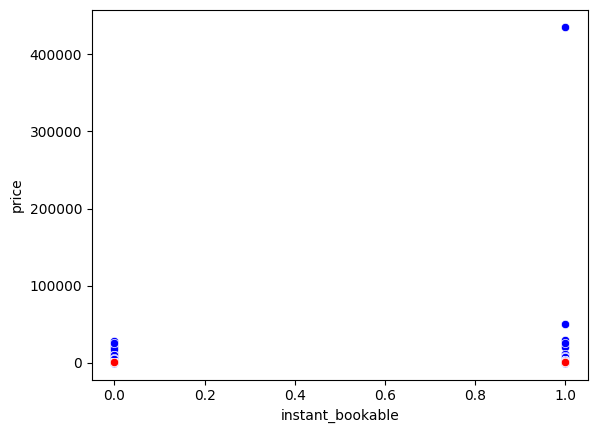

In [66]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones5', color="red", data=df)

In [67]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5 = model5.score(X=Vars_Indep5, y=Vars_Dep5)
coef_Deter5

0.001701151698711989

In [68]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl5 = np.sqrt(coef_Deter5)
coef_Correl5

0.04124502028987244

**price vs property_type**

In [70]:
tipos_habitacion = df['property_type'].unique()
tipos_habitacion

array(['Private room', 'Private room in rental unit',
       'Private room in home', 'Private room in condo',
       'Private room in guest suite',
       'Private room in serviced apartment', 'Private room in townhouse',
       'Private room in bed and breakfast', 'Room in boutique hotel',
       'Private room in guesthouse', 'Private room in loft',
       'Private room in tiny home', 'Private room in farm stay',
       'Private room in villa', 'Private room in casa particular',
       'Room in hotel', 'Private room in floor', 'Private room in cabin',
       'Room in aparthotel', 'Private room in hostel',
       'Private room in earthen home', 'Private room in dorm',
       'Private room in hut', 'Private room in dome',
       'Private room in vacation home', 'Private room in barn',
       'Private room in cottage', 'Private room in shipping container',
       'Private room in nature lodge', 'Private room in tower',
       'Private room in lighthouse', 'Private room in pension',
     

In [72]:
# Crear un diccionario de mapeo basado en los nuevos tipos de habitación proporcionados
tipo_a_numero = {
    'Private room': 1,
    'Private room in rental unit': 2,
    'Private room in home': 3,
    'Private room in condo': 4,
    'Private room in guest suite': 5,
    'Private room in serviced apartment': 6,
    'Private room in townhouse': 7,
    'Private room in bed and breakfast': 8,
    'Room in boutique hotel': 9,
    'Private room in guesthouse': 10,
    'Private room in loft': 11,
    'Private room in tiny home': 12,
    'Private room in farm stay': 13,
    'Private room in villa': 14,
    'Private room in casa particular': 15,
    'Room in hotel': 16,
    'Private room in floor': 17,
    'Private room in cabin': 18,
    'Room in aparthotel': 19,
    'Private room in hostel': 20,
    'Private room in earthen home': 21,
    'Private room in dorm': 22,
    'Private room in hut': 23,
    'Private room in dome': 24,
    'Private room in vacation home': 25,
    'Private room in barn': 26,
    'Private room in cottage': 27,
    'Private room in shipping container': 28,
    'Private room in nature lodge': 29,
    'Private room in tower': 30,
    'Private room in lighthouse': 31,
    'Private room in pension': 32,
    'Private room in bungalow': 33,
    'Private room in chalet': 34,
    'Private room in tent': 35,
    'Private room in castle': 36,
    'Private room in houseboat': 37,
    'Private room in resort': 38,
    'Private room in minsu': 39
}

# Aplicar el mapeo a la columna 'property_type'
df['property_type_numerico'] = df['property_type'].map(tipo_a_numero)


<Axes: xlabel='property_type_numerico', ylabel='price'>

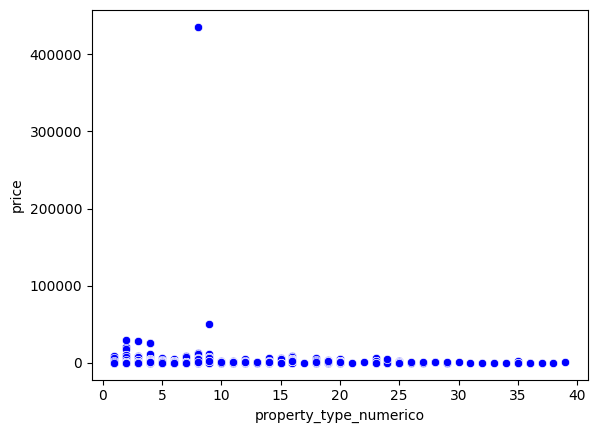

In [73]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='property_type_numerico', y='price', color="blue", data=df)

In [74]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep6 = df[['property_type_numerico']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep6 = df['price']

In [75]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model6 = LinearRegression()

In [76]:
#Veerficamos la finción relacionada al modelo
type (model6)

sklearn.linear_model._base.LinearRegression

In [77]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Vars_Dep6)

LinearRegression()

In [78]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_numerico'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([21.9288098]),
 'rank_': 1,
 'singular_': array([447.49212777]),
 'intercept_': 630.7827623784893}

In [79]:
model6.score(Vars_Indep6,Vars_Dep6)

0.00047678743698498227

In [80]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred6 = model6.predict(X=df[['property_type_numerico']])
y_pred6

array([652.71157218, 674.64038198, 696.56919178, ..., 981.64371921,
       981.64371921, 981.64371921])

In [81]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones6', y_pred6)
df

Predicciones6  Predicciones5  Predicciones3  Predicciones2  \
0        652.711572     603.094362     744.062319       1.909306   
1        674.640382     603.094362     568.596281       1.909306   
2        696.569192     603.094362     805.093984       1.991868   
3        718.498002     603.094362     843.238774       1.909306   
4        740.426811     603.094362     843.238774       1.909306   
...             ...            ...            ...            ...   
8688     696.569192    1025.654609     744.062319       2.074430   
8689     850.070860    1025.654609     744.062319       1.909306   
8690     981.643719    1025.654609     744.062319       1.909306   
8691     981.643719    1025.654609     744.062319       1.909306   
8692     981.643719    1025.654609     744.062319       1.909306   

      Predicciones1  Predicciones  \
0        767.063767    759.184125   
1        686.833079    727.640461   
2        686.833079    777.209076   
3        767.063767    759.184125   
4        767.063767    720.881105   
...             ...           ...   
8688     767.063767    759.184125   
8689     686.833079    777.209076   
8690     767.063767    777.209076   
8691     767.063767    777.209076   
8692     767.063767    777.209076   

                                           listing_url  host_since  \
0                  https://www.airbnb.com/rooms/131610  2011-05-31   
1                  https://www.airbnb.com/rooms/171109  2011-07-13   
2                 https://www.airbnb.com/rooms/1013504  2012-01-28   
3                 https://www.airbnb.com/rooms/1051636  2014-10-10   
4                 https://www.airbnb.com/rooms/1066945  2013-04-10   
...                                                ...         ...   
8688  https://www.airbnb.com/rooms/1251897198681126075  2023-11-15   
8689  https://www.airbnb.com/rooms/1252141718111439700  2016-04-16   
8690  https://www.airbnb.com/rooms/1252159821531694005  2024-08-13   
8691  https://www.airbnb.com/rooms/1252185591721328995  2024-08-13   
8692  https://www.airbnb.com/rooms/1252218347521498445  2024-08-13   

      host_response_time host_response_rate  ...  review_scores_checkin  \
0     a few days or more               100%  ...                   4.80   
1     within a few hours               100%  ...                   4.98   
2         within an hour               100%  ...                   4.92   
3     a few days or more               100%  ...                   4.97   
4         within an hour               100%  ...                   4.96   
...                  ...                ...  ...                    ...   
8688  a few days or more               100%  ...                   4.80   
8689      within an hour               100%  ...                   4.80   
8690      within an hour               100%  ...                   4.80   
8691      within an hour               100%  ...                   4.80   
8692      within an hour               100%  ...                   4.80   

      review_scores_communication review_scores_location review_scores_value  \
0                            4.80                   4.80                4.70   
1                            4.95                   4.97                4.81   
2                            4.94                   4.92                4.89   
3                            4.77                   4.93                4.73   
4                            4.91                   4.97                4.94   
...                           ...                    ...                 ...   
8688                         4.80                   4.80                4.70   
8689                         4.80                   4.80                4.70   
8690                         4.80                   4.80                4.70   
8691                         4.80                   4.80                4.70   
8692                         4.80                   4.80                4.70   

     calculated_host_listings_count  \
0 

<Axes: xlabel='property_type_numerico', ylabel='price'>

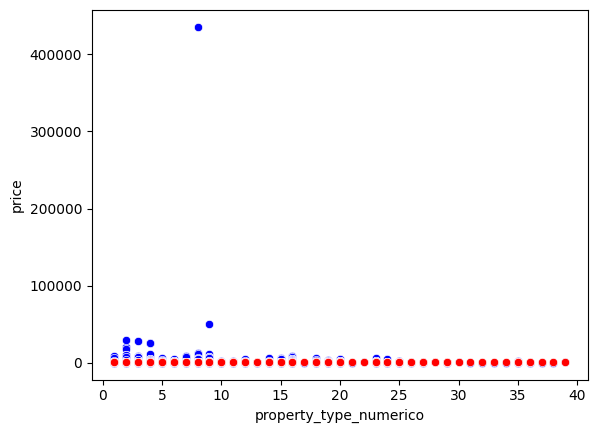

In [82]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='property_type_numerico', y='price', color="blue", data=df)
sns.scatterplot(x='property_type_numerico', y='Predicciones6', color="red", data=df)

In [83]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6 = model6.score(X=Vars_Indep6, y=Vars_Dep6)
coef_Deter6

0.00047678743698498227

In [84]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl6 = np.sqrt(coef_Deter6)
coef_Correl6

0.02183546282964898

**Mapa de calor**

In [85]:
# Utilizar el método select_dtypes para seleccionar solo columnas numéricas
df_numerico = df.select_dtypes(include=['number'])
df_numerico

Predicciones6  Predicciones5  Predicciones3  Predicciones2  \
0        652.711572     603.094362     744.062319       1.909306   
1        674.640382     603.094362     568.596281       1.909306   
2        696.569192     603.094362     805.093984       1.991868   
3        718.498002     603.094362     843.238774       1.909306   
4        740.426811     603.094362     843.238774       1.909306   
...             ...            ...            ...            ...   
8688     696.569192    1025.654609     744.062319       2.074430   
8689     850.070860    1025.654609     744.062319       1.909306   
8690     981.643719    1025.654609     744.062319       1.909306   
8691     981.643719    1025.654609     744.062319       1.909306   
8692     981.643719    1025.654609     744.062319       1.909306   

      Predicciones1  Predicciones  host_acceptance_rate  host_is_superhost  \
0        767.063767    759.184125                  92.0                  0   
1        686.833079    727.640461                  78.0                  1   
2        686.833079    777.209076                 100.0                  1   
3        767.063767    759.184125                  92.0                  0   
4        767.063767    720.881105                  75.0                  0   
...             ...           ...                   ...                ...   
8688     767.063767    759.184125                  92.0                  0   
8689     686.833079    777.209076                 100.0                  1   
8690     767.063767    777.209076                 100.0                  0   
8691     767.063767    777.209076                 100.0                  0   
8692     767.063767    777.209076                 100.0                  0   

       price  instant_bookable  ...  review_scores_checkin  \
0      120.0                 0  ...                   4.80   
1      335.0                 0  ...                   4.98   
2      384.0                 0  ...                   4.92   
3      947.0                 0  ...                   4.97   
4     1200.0                 0  ...                   4.96   
...      ...               ...  ...                    ...   
8688   262.0                 1  ...                   4.80   
8689   488.0                 1  ...                   4.80   
8690  2800.0                 1  ...                   4.80   
8691  2700.0                 1  ...                   4.80   
8692  2600.0                 1  ...                   4.80   

      review_scores_communication  review_scores_location  \
0                            4.80                    4.80   
1                            4.95                    4.97   
2                            4.94                    4.92   
3                            4.77                    4.93   
4                            4.91                    4.97   
...                           ...                     ...   
8688                         4.80                    4.80   
8689                         4.80                    4.80   
8690                         4.80                    4.80   
8691                         4.80                    4.80   
8692                         4.80                    4.80   

      review_scores_value  calculated_host_listings_count  \
0                    4.70                             3.0   
1                    4.81                             2.0   
2                    4.89                             2.0   
3                    4.73                             1.0   
4                    4.94                             5.0   
...                   ...                             ...   
8688                 4.70                             1.0   
8689                 4.70                             9.8   
8690                 4.70                            16.0   
8691                 4.70                            16.0   
8692                 4.70                            16.0   

      calculated_host_listings_count_enti

In [86]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df_numerico.corr()
Corr_Factors

Predicciones6  Predicciones5  \
Predicciones6                                      1.000000       0.169635   
Predicciones5                                      0.169635       1.000000   
Predicciones3                                     -0.033676      -0.124453   
Predicciones2                                     -0.034287       0.015304   
Predicciones1                                      0.036729      -0.062411   
Predicciones                                       0.100530       0.313874   
host_acceptance_rate                               0.100530       0.313874   
host_is_superhost                                 -0.036729       0.062411   
price                                              0.021835       0.041245   
instant_bookable                                   0.169635       1.000000   
id                                                 0.066349       0.095177   
host_id                                            0.141785       0.129902   
host_listings_count                                0.209354       0.394026   
host_total_listings_count                          0.211777       0.356917   
latitude                                           0.093945       0.126643   
longitude                                          0.043108      -0.035451   
accommodates                                       0.157957       0.133824   
bathrooms                                         -0.034287       0.015304   
bedrooms                                           0.009550      -0.066846   
beds                                               0.090200      -0.056801   
minimum_nights                                    -0.180242      -0.235780   
maximum_nights                                    -0.018253       0.019589   
minimum_nights_avg_ntm                            -0.169726      -0.212760   
maximum_nights_avg_ntm                            -0.004540       0.184101   
availability_30                                    0.096643       0.078478   
availability_60                                    0.088096       0.074476   
availability_90                                    0.085059       0.085949   
availability_365                                   0.101203       0.123828   
number_of_reviews                                  0.008571       0.121213   
number_of_reviews_ltm                              0.026851       0.129107   
number_of_reviews_l30d                             0.047765       0.096535   
review_scores_rating                              -0.087694      -0.195014   
review_scores_accuracy                            -0.082389      -0.186429   
review_scores_cleanliness                         -0.033676      -0.124453   
review_scores_checkin                             -0.038088      -0.088119   
review_scores_communication                       -0.060544      -0.106562   
review_scores_location                            -0.056554      -0.024620   
review_scores_value                               -0.068757      -0.116545   
calculated_host_listings_count                     0.238826       0.378637   
calculated_host_listings_count_entire_homes        0.042783       0.237071   
calculated_host_listings_count_private_rooms       0.076205       0.161427   
calculated_host_listings_count_shared_rooms        0.074745       0.109820   
reviews_per_month                                  0.025843       0.110309   
property_type_numerico                             1.000000       0.169635   

                                              Predicciones3  Predicciones2  \
Predicciones6                                     -0.033676      -0.034287   
Predicciones5                                     -0.124453       0.015304   
Predicciones3                                      1.000000      -0.053132   
Predicciones2                                     -0.053132       1.000000   
Predicciones1                                     -0.087919      -0.008789   
Predicciones                                      -0.056726      -0

In [87]:
#Encontramos el valor absoluto de todas las correlaciones entre las  variables
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones6  Predicciones5  \
Predicciones6                                      1.000000       0.169635   
Predicciones5                                      0.169635       1.000000   
Predicciones3                                      0.033676       0.124453   
Predicciones2                                      0.034287       0.015304   
Predicciones1                                      0.036729       0.062411   
Predicciones                                       0.100530       0.313874   
host_acceptance_rate                               0.100530       0.313874   
host_is_superhost                                  0.036729       0.062411   
price                                              0.021835       0.041245   
instant_bookable                                   0.169635       1.000000   
id                                                 0.066349       0.095177   
host_id                                            0.141785       0.129902   
host_listings_count                                0.209354       0.394026   
host_total_listings_count                          0.211777       0.356917   
latitude                                           0.093945       0.126643   
longitude                                          0.043108       0.035451   
accommodates                                       0.157957       0.133824   
bathrooms                                          0.034287       0.015304   
bedrooms                                           0.009550       0.066846   
beds                                               0.090200       0.056801   
minimum_nights                                     0.180242       0.235780   
maximum_nights                                     0.018253       0.019589   
minimum_nights_avg_ntm                             0.169726       0.212760   
maximum_nights_avg_ntm                             0.004540       0.184101   
availability_30                                    0.096643       0.078478   
availability_60                                    0.088096       0.074476   
availability_90                                    0.085059       0.085949   
availability_365                                   0.101203       0.123828   
number_of_reviews                                  0.008571       0.121213   
number_of_reviews_ltm                              0.026851       0.129107   
number_of_reviews_l30d                             0.047765       0.096535   
review_scores_rating                               0.087694       0.195014   
review_scores_accuracy                             0.082389       0.186429   
review_scores_cleanliness                          0.033676       0.124453   
review_scores_checkin                              0.038088       0.088119   
review_scores_communication                        0.060544       0.106562   
review_scores_location                             0.056554       0.024620   
review_scores_value                                0.068757       0.116545   
calculated_host_listings_count                     0.238826       0.378637   
calculated_host_listings_count_entire_homes        0.042783       0.237071   
calculated_host_listings_count_private_rooms       0.076205       0.161427   
calculated_host_listings_count_shared_rooms        0.074745       0.109820   
reviews_per_month                                  0.025843       0.110309   
property_type_numerico                             1.000000       0.169635   

                                              Predicciones3  Predicciones2  \
Predicciones6                                      0.033676       0.034287   
Predicciones5                                      0.124453       0.015304   
Predicciones3                                      1.000000       0.053132   
Predicciones2                                      0.053132       1.000000   
Predicciones1                                      0.087919       0.008789   
Predicciones                                       0.056726       0

<Axes: >

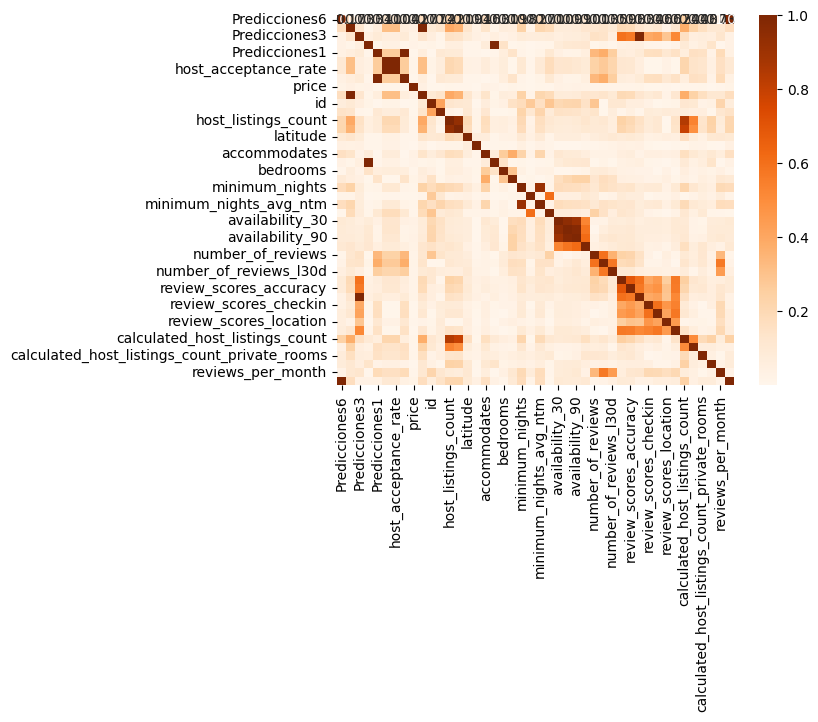

In [88]:
#
Heat_Map = sns.heatmap(Corr_Factors1, cmap='Oranges', annot=True, fmt=".2f")
Heat_Map

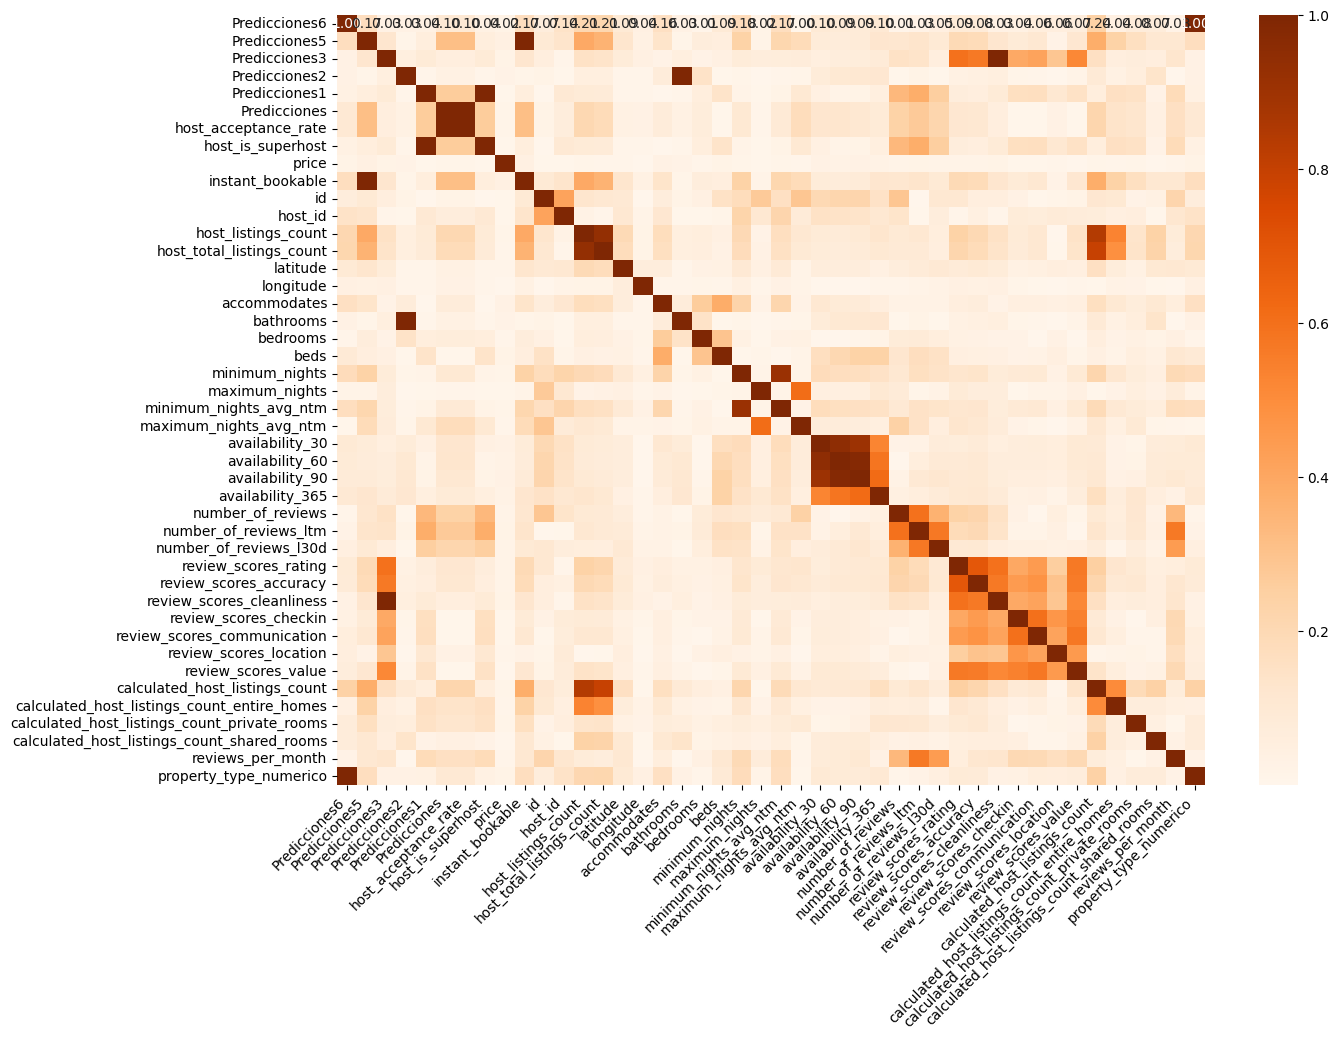

In [89]:
# # Crear la figura y el mapa de calor
plt.figure(figsize=(14, 10))  # Ajusta el tamaño de la figura según sea necesario
Heat_Map = sns.heatmap(Corr_Factors1, cmap='Oranges', annot=True, fmt=".2f", annot_kws={"size": 10})

# # Ajusta las etiquetas de los ejes si es necesario
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# # Mostrar el mapa de calor
plt.show()

# # Crear la figura y el mapa de calor
# plt.figure(figsize=(20, 15))  # Aumenta el tamaño de la figura
# Heat_Map = sns.heatmap(Corr_Factors1, cmap='Oranges', annot=True, fmt=".2f", annot_kws={"size": 10})

# # Ajusta las etiquetas de los ejes si es necesario
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)

# # Mostrar el mapa de calor
# plt.show()